In [11]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/price-jones/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['legend', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [12]:
from dbscan_display import read_results,typenames,nametypes

In [3]:
print(typenames)

{'spec': 'spectra', 'abun': 'abundances', 'reda': 'reduced abundances', 'toph': 'tophat windows', 'wind': 'windows', 'prin': '10 principal components', 'prin2': '02 principal components', 'prin5': '05 principal components', 'prin10': '10 principal components', 'prin20': '20 principal components', 'prin30': '30 principal components', 'prin50': '50 principal components', 'tabn': 'ting abundances', 'trda': 'reduced ting abundances'}


In [4]:
d = read_results(datatype = 'spec', case = 12, 
                 timestamp = '2018-08-14.20.35.09.910397')

In [6]:
import matplotlib

In [7]:
colors={'spec':'#5E3023',
        'toph':'#FCA17D',
        'prin30':'#C08552',
        'abun':'#895737',
        'tabn':'#EE6352',
        'reda':'b',
        'trda':'m'}

shapes={'spec':'v',
        'toph':'s',
        'prin30':'o',
        'abun':'p',
        'tabn':'^',
        'reda':'o',
        'trda':'o'}

sizes={'spec':10,
        'toph':10,
        'prin30':10,
        'abun':10,
        'tabn':10,
        'reda':10,
        'trda':10}

alphas={'spec':0.7,
        'toph':0.7,
        'prin30':0.7,
        'abun':0.7,
        'tabn':0.7}

names={'spec':'spectra',
       'toph':'binary mask',
       'prin30':'principal components',
       'abun':'abundances\n(Holtzman et. al. 2015)',
       'tabn':'abundances\n(Ting et. al. 2016)'}

### For only epsilon variation

In [8]:
d.read_base_data()
if not d.allbad:
    d.generate_average_stats(testnum=10,testsize=20,testeff=0.6,testcom=0.2,iters=100,minmem=20)

spectra
cluster 1984
matches 1
E [1.]
C [1.]
cluster 2763
matches 1
E [1.]
C [1.]
cluster 1984
matches 1
E [1.]
C [1.]
cluster 2763
matches 1
E [1.]
C [1.]
cluster 2511
matches 1
E [0.83098592]
C [1.]
cluster 2763
matches 1
E [1.]
C [1.]
cluster 1984
matches 1
E [1.]
C [1.]
cluster 2511
matches 1
E [0.83098592]
C [1.]
cluster 1984
matches 1
E [1.]
C [1.]
cluster 2763
matches 1
E [1.]
C [1.]
cluster 1984
matches 1
E [1.]
C [1.]
cluster 2763
matches 1
E [1.]
C [1.]
cluster 2763
matches 1
E [1.]
C [1.]
cluster 2763
matches 1
E [1.]
C [1.]
cluster 7849
matches 1
E [1.]
C [0.61818182]
cluster 2511
matches 1
E [0.83098592]
C [1.]
cluster 7849
matches 1
E [1.]
C [0.61818182]
cluster 2511
matches 1
E [0.83098592]
C [1.]
cluster 7849
matches 1
E [1.]
C [1.]
cluster 7849
matches 1
E [1.]
C [1.]
cluster 7849
matches 1
E [1.]
C [1.]
cluster 7849
matches 1
E [1.]
C [1.]
cluster 7849
matches 1
E [1.]
C [1.]
cluster 7849
matches 1
E [1.]
C [1.]
cluster 7849
matches 1
E [1.]
C [1.]
abundances
cluster 

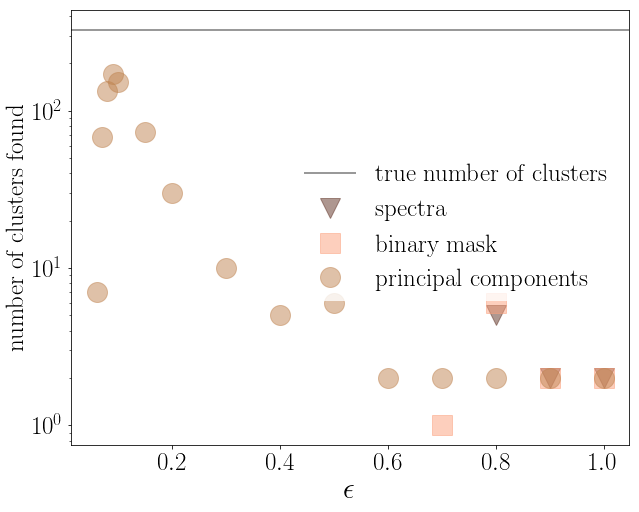

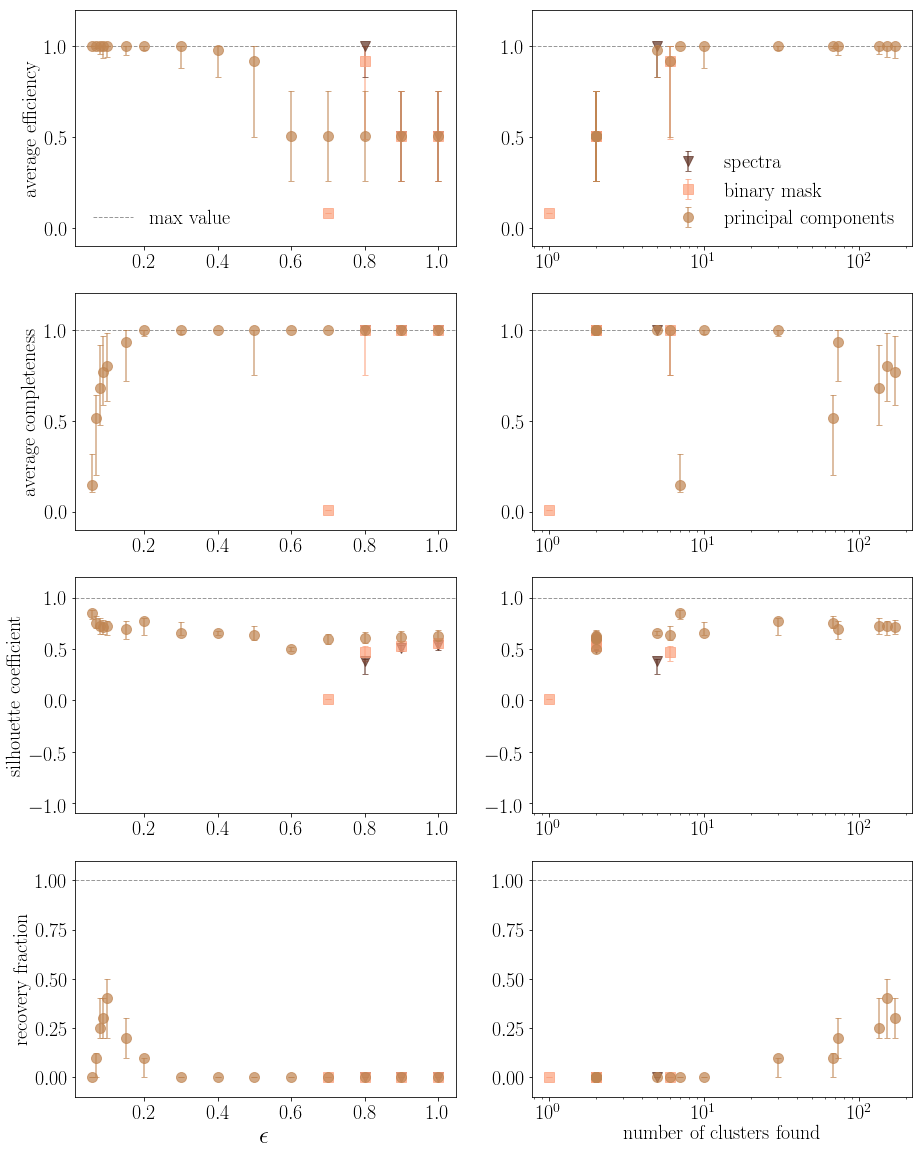

In [9]:
keys = list(typenames.keys())
keys = ['spec','toph','prin30']
for key in keys:
    if '{0}_statsource'.format(key) in dir(d):
        ss = getattr(d,'{0}_statsource'.format(key))
        ss = ss.data
        if any(ss['numc'] > 0.5):
            params = ss['params']
            mask = ss['numc'] > 0.5
            eps = np.array([float(i.split(', ')[0]) for i in params])
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  25 # Tune this according to personal preference
                    }
            matplotlib.rc('font',**font)
            plt.rc('text', usetex=True)
            plt.figure(2,figsize=(10,8))
            ax = plt.subplot(111)
            ax.set_yscale("log")
            if key == keys[0]:
                plt.axhline(ss['tnumc'][0],color='k',lw=2,alpha=0.4,label='true number of clusters')
            plt.errorbar(eps[mask],ss['numc'][mask],label='{0}'.format(names[key]),alpha=0.5,color=colors[key],markersize=2*sizes[key],marker=shapes[key],ls='None')
            plt.xlabel('$\epsilon$',fontsize=30)
            plt.ylabel('number of clusters found')
            legend = plt.legend(loc='best')
            legend.get_frame().set_linewidth(0.0)
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  20 # Tune this according to personal preference
                    }
            matplotlib.rc('font',**font)
            plt.rc('text', usetex=True)
            plt.figure(1,figsize=(15,20))
            plt.subplot(421)
            plt.ylabel('average efficiency')
            if key ==keys[0]:
                plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.errorbar(eps[mask],ss['stdeff'][:,1][mask],yerr=[ss['stdeff'][:,1][mask]-ss['stdeff'][:,0][mask],ss['stdeff'][:,2][mask]-ss['stdeff'][:,1][mask]],capsize=3,alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            legend = plt.legend(loc='best')
            legend.get_frame().set_linewidth(0.0)
            plt.ylim(-0.1,1.2)
            ax = plt.subplot(422)
            ax.set_xscale("log")
            if key ==keys[0]:
                plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--')
            plt.errorbar(ss['numc'][mask],ss['stdeff'][:,1][mask],yerr=[ss['stdeff'][:,1][mask]-ss['stdeff'][:,0][mask],ss['stdeff'][:,2][mask]-ss['stdeff'][:,1][mask]],label='{0}'.format(names[key]),alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            legend = plt.legend(loc='best')
            legend.get_frame().set_linewidth(0.0)
            plt.ylim(-0.1,1.2)
            plt.subplot(423)
            if key ==keys[0]:
                plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.ylabel('average completeness')
            plt.errorbar(eps[mask],ss['stdcom'][:,1][mask],yerr=[ss['stdcom'][:,1][mask]-ss['stdcom'][:,0][mask],ss['stdcom'][:,2][mask]-ss['stdcom'][:,1][mask]],capsize=3,label='{0}'.format(names[key]),alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            plt.ylim(-0.1,1.2)
            ax = plt.subplot(424)
            ax.set_xscale("log")
            if key ==keys[0]:
                plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.errorbar(ss['numc'][mask],ss['stdcom'][:,1][mask],alpha=alphas[key],yerr=[ss['stdcom'][:,1][mask]-ss['stdcom'][:,0][mask],ss['stdcom'][:,2][mask]-ss['stdcom'][:,1][mask]],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            plt.ylim(-0.1,1.2)
            plt.subplot(425)
            if key ==keys[0]:
                plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.ylabel('silhouette coefficient')
            plt.errorbar(eps[mask],ss['stdfsi'][:,1][mask],label='{0}'.format(typenames[key]),yerr=[ss['stdfsi'][:,1][mask]-ss['stdfsi'][:,0][mask],ss['stdfsi'][:,2][mask]-ss['stdfsi'][:,1][mask]],capsize=3,alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            plt.ylim(-1.1,1.2)
            ax = plt.subplot(426)
            ax.set_xscale("log")
            if key ==keys[0]:
                plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.errorbar(ss['numc'][mask],ss['stdfsi'][:,1][mask],alpha=alphas[key],yerr=[ss['stdfsi'][:,1][mask]-ss['stdfsi'][:,0][mask],ss['stdfsi'][:,2][mask]-ss['stdfsi'][:,1][mask]],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            plt.ylim(-1.1,1.2)
            plt.subplot(427)
            plt.ylabel('recovery fraction')
            plt.xlabel('$\epsilon$',fontsize=25)
            if key ==keys[0]:
                plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.errorbar(eps[mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            plt.ylim(-0.1,1.1)
            ax = plt.subplot(428)
            ax.set_xscale("log")
            if key ==keys[0]:
                plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.errorbar(ss['numc'][mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            plt.ylim(-0.1,1.1)
            plt.xlabel('number of clusters found')
plt.figure(2)
plt.savefig('numfound_spec_5e4.pdf')
plt.figure(1)
plt.savefig('stats_spec_5e4.pdf')
            

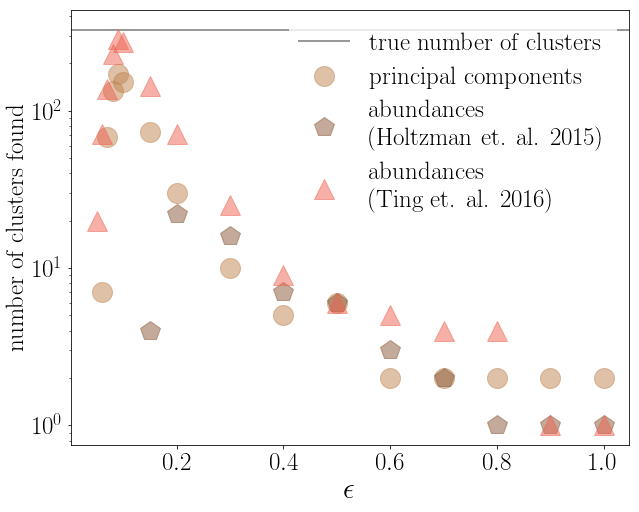

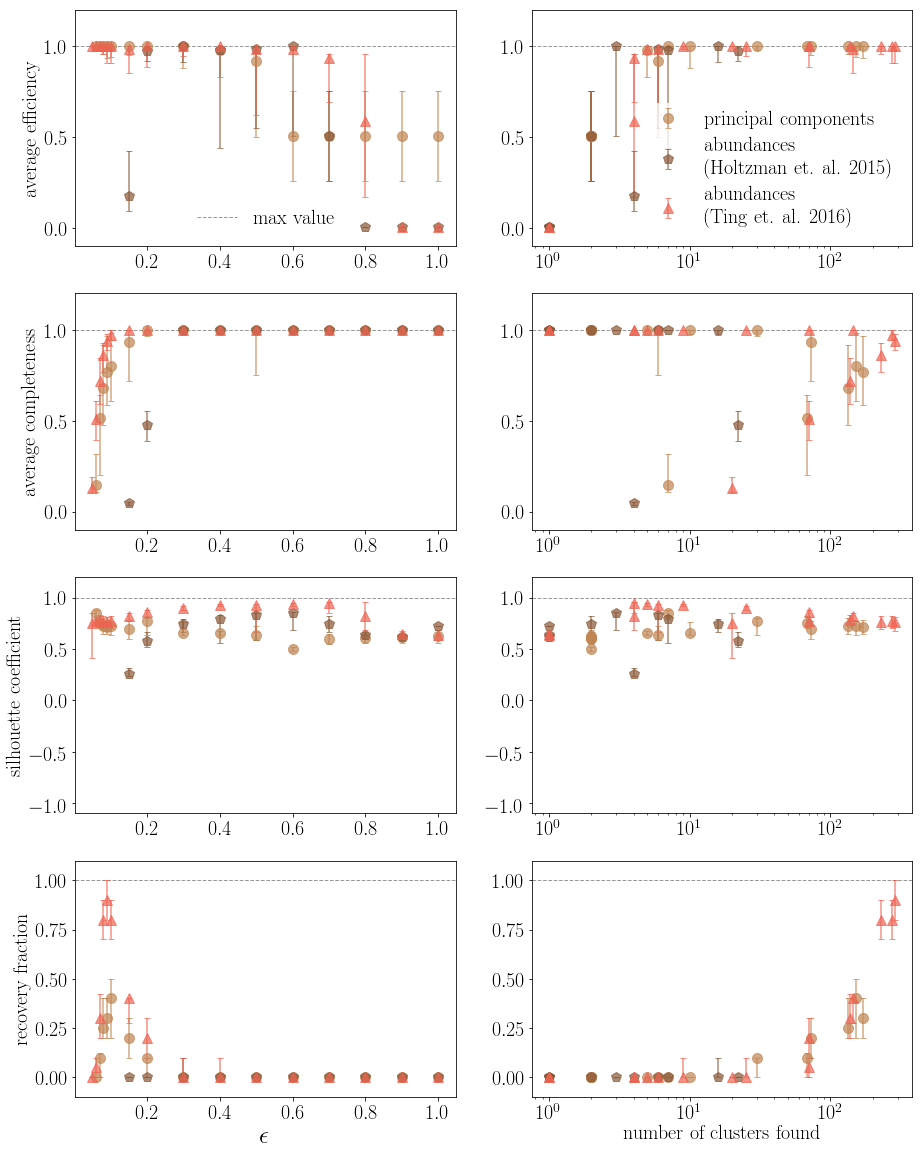

In [10]:
keys = list(typenames.keys())
keys = ['prin30','abun','tabn']#,'reda','trda']
for key in keys:
    if '{0}_statsource'.format(key) in dir(d):
        ss = getattr(d,'{0}_statsource'.format(key))
        ss = ss.data
        if any(ss['numc'] > 0.5):

            params = ss['params']
            mask = ss['numc'] > 0.5
            eps = np.array([float(i.split(', ')[0]) for i in params])
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  25 # Tune this according to personal preference
                    }
            matplotlib.rc('font',**font)
            plt.rc('text', usetex=True)
            plt.figure(2,figsize=(10,8))
            ax = plt.subplot(111)
            ax.set_yscale("log")
            if key == keys[0]:
                plt.axhline(ss['tnumc'][0],color='k',lw=2,alpha=0.4,label='true number of clusters')
            plt.errorbar(eps[mask],ss['numc'][mask],label='{0}'.format(names[key]),alpha=0.5,color=colors[key],markersize=2*sizes[key],marker=shapes[key],ls='None')
            plt.xlabel('$\epsilon$',fontsize=30)
            plt.ylabel('number of clusters found')
            legend = plt.legend(loc='best')
            legend.get_frame().set_linewidth(0.0)
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  20 # Tune this according to personal preference
                    }
            matplotlib.rc('font',**font)
            plt.rc('text', usetex=True)
            plt.figure(1,figsize=(15,20))
            plt.subplot(312)
            plt.ylabel('average efficiency')
            if key ==keys[0]:
                plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.errorbar(eps[mask],ss['stdeff'][:,1][mask],yerr=[ss['stdeff'][:,1][mask]-ss['stdeff'][:,0][mask],ss['stdeff'][:,2][mask]-ss['stdeff'][:,1][mask]],capsize=3,alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            legend = plt.legend(loc='best')
            legend.get_frame().set_linewidth(0.0)
            plt.ylim(-0.1,1.2)
#             ax = plt.subplot(422)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--')
#             plt.errorbar(ss['numc'][mask],ss['stdeff'][:,1][mask],yerr=[ss['stdeff'][:,1][mask]-ss['stdeff'][:,0][mask],ss['stdeff'][:,2][mask]-ss['stdeff'][:,1][mask]],label='{0}'.format(names[key]),alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             legend = plt.legend(loc='best')
#             legend.get_frame().set_linewidth(0.0)
#             plt.ylim(-0.1,1.2)
            plt.subplot(313)
            if key ==keys[0]:
                plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.ylabel('average completeness')
            plt.errorbar(eps[mask],ss['stdcom'][:,1][mask],yerr=[ss['stdcom'][:,1][mask]-ss['stdcom'][:,0][mask],ss['stdcom'][:,2][mask]-ss['stdcom'][:,1][mask]],capsize=3,label='{0}'.format(names[key]),alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            plt.ylim(-0.1,1.2)
#             ax = plt.subplot(424)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(ss['numc'][mask],ss['stdcom'][:,1][mask],alpha=alphas[key],yerr=[ss['stdcom'][:,1][mask]-ss['stdcom'][:,0][mask],ss['stdcom'][:,2][mask]-ss['stdcom'][:,1][mask]],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-0.1,1.2)
#             plt.subplot(425)
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.ylabel('silhouette coefficient')
#             plt.errorbar(eps[mask],ss['stdfsi'][:,1][mask],label='{0}'.format(typenames[key]),yerr=[ss['stdfsi'][:,1][mask]-ss['stdfsi'][:,0][mask],ss['stdfsi'][:,2][mask]-ss['stdfsi'][:,1][mask]],capsize=3,alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-1.1,1.2)
#             ax = plt.subplot(426)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(ss['numc'][mask],ss['stdfsi'][:,1][mask],alpha=alphas[key],yerr=[ss['stdfsi'][:,1][mask]-ss['stdfsi'][:,0][mask],ss['stdfsi'][:,2][mask]-ss['stdfsi'][:,1][mask]],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-1.1,1.2)
            plt.figure()
            plt.subplot(121)
            plt.ylabel('recovery fraction')
            plt.xlabel('$\epsilon$',fontsize=25)
            if key ==keys[0]:
                plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.errorbar(eps[mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            plt.ylim(-0.1,1.1)
            ax = plt.subplot(122)
            ax.set_xscale("log")
            if key ==keys[0]:
                plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.errorbar(ss['numc'][mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            plt.ylim(-0.1,1.1)
            plt.xlabel('number of clusters found')
plt.figure(2)
plt.savefig('numfound_abun_5e4.pdf')
plt.figure(1)
plt.savefig('stats_abun_5e4.pdf')

In [54]:
import h5py

In [55]:
c = h5py.File('../PC12.hdf5','r')
names = ['vec2','vec5','vec10','vec20','vec50','vec1000','vec7214']

In [56]:
explained = 0.9
varatio = c['vec7214'].attrs['varratio']
a = np.where(np.cumsum(varatio)>explained)[0][0]
print('you need {0} PCs to exceed {1}% explained variance'.format(a+1,explained*100))

you need 2298 PCs to exceed 90.0% explained variance


In [57]:
vecs = 30
print('if you have {0} PCs, you can explain {1}% of the variance'.format(vecs,np.cumsum(varatio)[vecs-1]))

if you have 30 PCs, you can explain 0.7092947908025158% of the variance


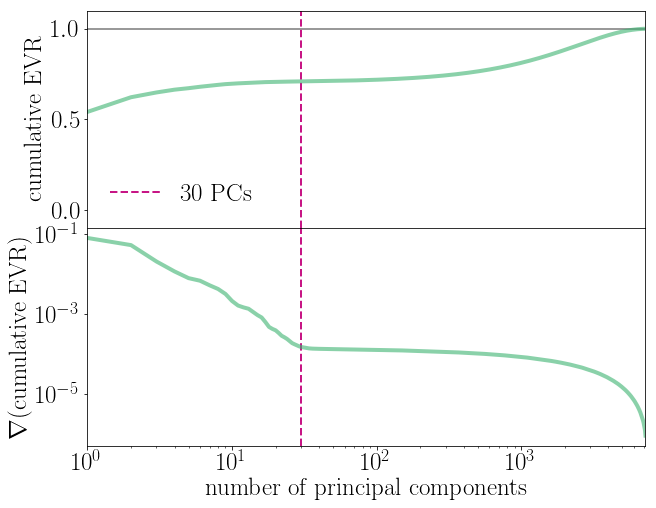

In [81]:
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  25 # Tune this according to personal preference
        }
matplotlib.rc('font',**font)
plt.rc('text', usetex=True)
mark = 30
for n,name in enumerate(names):
    eigvecs = c[name]
    eigvals = c[name].attrs['eigvals']
    varatio = c[name].attrs['varratio']
    plt.figure(1,figsize=(10,8))
    plt.subplot(211)
    if n == len(names)-1:
        plt.axhline(1,color='k',ls='-',lw=2,alpha=0.4)
        plt.axvline(mark,color='mediumvioletred',ls='--',lw=2,label='{0} PCs'.format(mark))
        plt.semilogx(np.arange(1,len(varatio)+1,1),np.cumsum(varatio),lw=4,color='mediumseagreen',alpha=0.6)
        plt.ylim(-0.1,1.1)
        plt.xlim(0,7214)
        plt.xticks([])
        #plt.xlabel('number of principal components')
        plt.ylabel('cumulative EVR')
        legend = plt.legend(loc='best')
        legend.get_frame().set_linewidth(0.0)
    plt.subplot(212) 
    if n == len(names)-1:
        plt.axvline(mark,color='mediumvioletred',ls='--',lw=2)
        plt.loglog(np.arange(1,len(varatio)+1,1),np.gradient(np.cumsum(varatio)),lw=4,color='mediumseagreen',alpha=0.6)
        plt.xlabel('number of principal components')
        plt.ylabel(r'$\nabla$(cumulative EVR)')
        plt.xlim(0,7214)
    plt.subplots_adjust(hspace=0.0)
plt.figure(1)
plt.savefig('principal_components.pdf')